Using breast_cancer dataset from sklearn. Lecture by Misra Turp.

#Basic Decision Tree

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data  = data['data'], columns = data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
y = data['target']        #since we are using a given data from sklearn
X = df.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [3]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [4]:
y_pred = dtc.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score :", accuracy)

Accuracy score : 0.9298245614035088


#Changes / Optimisations

In [6]:
y = data['target']        #since we are using a given data from sklearn
X = df.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, ccp_alpha = 0.01)
#criterion defines the model being used
#max_depth is maximum allowed depth
#ccp_alpha defines the pruning intesity

dtc = dtc.fit(X_train, y_train)

In [8]:
y_pred = dtc.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score :", accuracy)

Accuracy score : 0.9473684210526315


#Checking importance of each feature

In [10]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
feature_imp = pd.DataFrame(dtc.feature_importances_, index = feature_names, columns = ['Value'])
feature_imp

,Value
mean radius,0.000000
mean texture,0.000000
mean perimeter,0.000000
mean area,0.000000
mean smoothness,0.000000
mean compactness,0.000000
mean concavity,0.000000
mean concave points,0.613722
mean symmetry,0.000000
mean fractal dimension,0.000000


In [16]:
feature_imp = feature_imp[feature_imp['Value'] > 0]
feature_imp

,Value
mean concave points,0.613722
radius error,0.022523
concave points error,0.019377
worst radius,0.096785
worst texture,0.114848
worst perimeter,0.109817
worst concave points,0.022929


<Axes: >

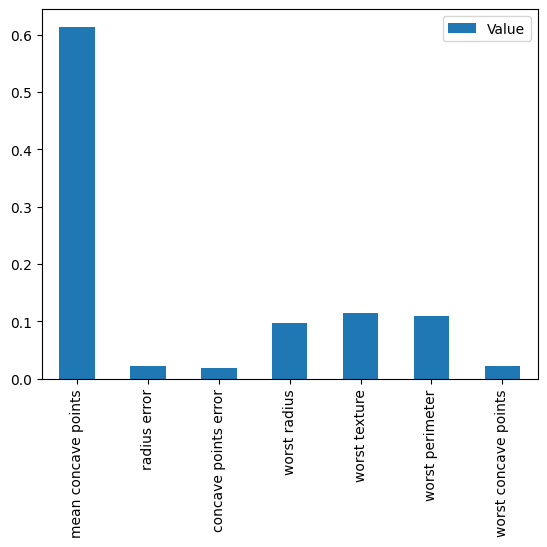

In [17]:
feature_imp.plot(kind = 'bar')

#Plotting the tree

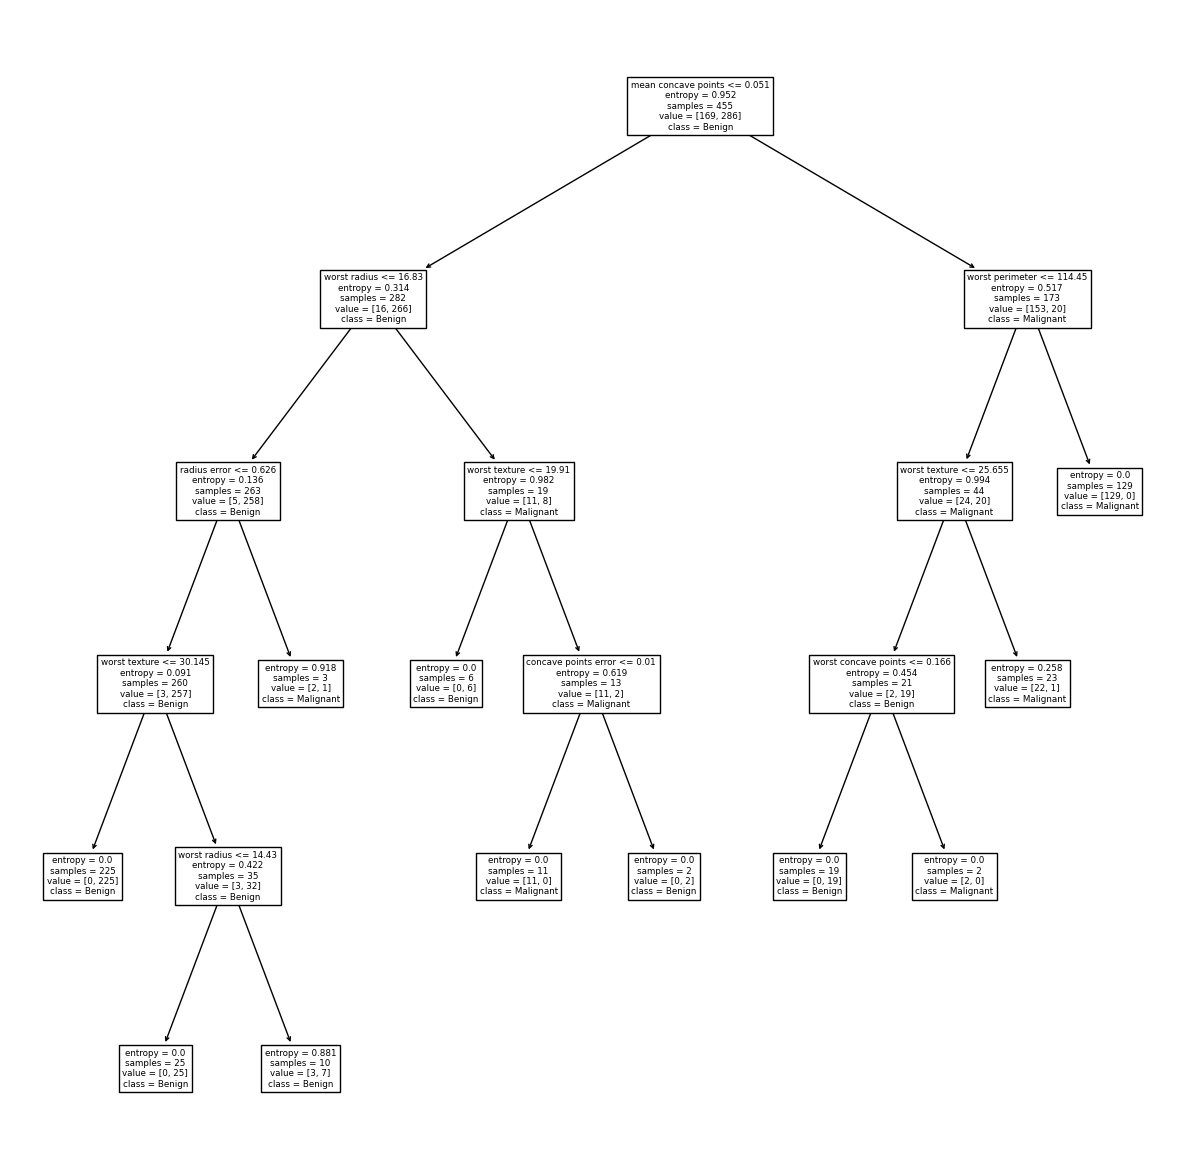

In [22]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(15, 15))
_ = tree.plot_tree(dtc,
                   feature_names = feature_names,
                   class_names = {0:'Malignant', 1:'Benign'},
                   )